# Decision Tree Lab

In [2]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
try:
  from CS270Boi.discussion270 import Discussion
except:
  !pip install -U -q CS270Boi
  from CS270Boi.discussion270 import Discussion

C:\Users\hende\AppData\Local\Temp\ipykernel_3316\2091430561.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1.0 (0%) Set `net_id` to Your NetID

In [3]:
# This should match your BYU email.
# For example, if my BYU email were jake270@byu.edu, I would set net_id to "jake270"

net_id = "joshhend"

# --------------------_Make sure to run all of the cells before continuing_--------------------
### The discussions and text box are loaded in by running the cell associated with the discussion.
### If you experience any problems/errors with the discussions, please send Jake Cahoon (TA) a message on Discord :)

## 1 Debug and Eval

### 1.1 (5%) Debug

- Train on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8')

Expected Accuracy = [1.0]


In [3]:
#Debug
iris_arff = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_arff[0])
iris_df['class'] = iris_df['class'].str.decode('utf-8')

X = iris_df.drop('class', axis=1)
y = iris_df['class']

clf = DecisionTreeClassifier()
clf.fit(X, y)

print("Accuracy: ", clf.score(X, y))

Accuracy:  1.0


### 1.2 (5%) Evaluation

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [5]:
# Evaluation

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

print("Accuracy: ", clf.score(X, y))

Accuracy:  0.9733333333333334


In [6]:
# @title 1.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "1.1DT"
questions = ["Include a general discussion about what you did/learned above."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Include a general discussion about what you did/learned above.**

The version of the decision tree classifier that could only go 3 levels deep (`max_depth=3`) did not get as good of an accuracy score as the default parameter one because it was not allowed to split the data enough times to completely learn the data. Sometimes, setting `max_depth` is a way to ensure that the model doesn't overfit. But in this case, `max_depth` was too low and the model could not learn sufficiently.

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [15]:
# Learn Voting with missing values.
voting_arff = arff.loadarff('voting_with_missing.arff')
voting_df = pd.DataFrame(voting_arff[0])

# Preprocessing
voting_df = voting_df.apply(lambda x: x.str.decode('utf-8') if x.dtype == 'object' else x)
voting_df = voting_df.replace('?', 'u')
voting_df = pd.get_dummies(voting_df, columns=voting_df.columns[:-1])

voting_df.head()

,Class,handicapped-infants_n,handicapped-infants_u,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_u,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_u,adoption-of-the-budget-resolution_y,...,superfund-right-to-sue_y,crime_n,crime_u,crime_y,duty-free-exports_n,duty-free-exports_u,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_u,export-administration-act-south-africa_y
0,republican,True,False,False,False,False,True,True,False,False,...,True,False,False,True,True,False,False,False,False,True
1,republican,True,False,False,False,False,True,True,False,False,...,True,False,False,True,True,False,False,False,True,False
2,democrat,False,True,False,False,False,True,False,False,True,...,True,False,False,True,True,False,False,True,False,False
3,democrat,True,False,False,False,False,True,False,False,True,...,True,True,False,False,True,False,False,False,False,True
4,democrat,False,False,True,False,False,True,False,False,True,...,True,False,False,True,False,False,True,False,False,True


In [16]:
X = voting_df.drop('Class', axis=1)
y = voting_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("Train accuracy: ", clf.score(X_train, y_train))
print("Test accuracy: ", clf.score(X_test, y_test))

Train accuracy:  1.0
Test accuracy:  0.9425287356321839


In [8]:
# @title 2.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.1DT"
questions = ["How did you handle the missing values?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**How did you handle the missing values?**

I handled the missing values by replacing the question marks with a 'u'. I then one-hot encoded the values of each of the features, so each feature got expanded into three features: feature=yes, feature=no, and feature=unknown. The model seemed to perfectly fit to the training data, and it got a pretty good accuracy score on the test data (95%).

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [6]:
from sklearn.model_selection import cross_val_score

cars_arff = arff.loadarff('cars.arff')
cars_df = pd.DataFrame(cars_arff[0])
cars_df = cars_df.apply(lambda x: x.str.decode('utf-8') if x.dtype == 'object' else x)

# Preprocessing
cars_df = pd.get_dummies(cars_df, columns=cars_df.columns[:-1])

X = cars_df.drop('class', axis=1)
y = cars_df['class']

In [7]:
clf = DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print("Accuracies:\n", scores)
print("Mean accuracy: ", scores.mean())

Accuracies:
 [0.75722543 0.78612717 0.92485549 0.67630058 0.83815029 0.9132948
 0.88439306 0.86127168 0.9127907  0.93023256]
Mean accuracy:  0.848464175292378


| Fold | Accuracy |
|------|----------|
| 1 | 0.757 |
| 2 | 0.780 |
| 3 | 0.936 |
| 4 | 0.676 |
| 5 | 0.838 |
| 6 | 0.925 |
| 7 | 0.884 |
| 8 | 0.861 |
| 9 | 0.913 |
| 10 | 0.837 |
| -- | -- |
| Avg | 0.841 |

In [32]:
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracies:\n", scores)
print("Mean accuracy: ", scores.mean())

Accuracies:
 [0.7283237  0.72543353 0.75144509 0.75362319 0.8057971 ]
Mean accuracy:  0.75292452039876


| Fold | Accuracy |
|------|----------|
| 1 | 0.728 |
| 2 | 0.725 |
| 3 | 0.751 |
| 4 | 0.754 |
| 5 | 0.806 |
| -- | -- |
| Avg | 0.753 |

In [33]:
# @title 2.2 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.2DT"
questions = ["Include a general discussion about what you did/learned above."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Include a general discussion about what you did/learned above.**

I loaded in the dataset and one-hot encoded the features. The 10-fold cross validation resulted with an average score of 84%, but with a fairly large spread between the folds, ranging from 68% to 93%. This is likely due to the folds being smaller because there were 10 of them, so there may have been a few "easy" validation sets and a few "hard" validation sets. On the other hand, the 5-fold cross validation resulted in an average accuracy of 75%, but with a tighter spread. It ranged from 73% to 81%. This is likely due to the training sets being smaller and the testing sets being larger. 

### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered).
- Compare your thoughts on important features with the attribute feature_importances_

In [9]:
from sklearn import tree

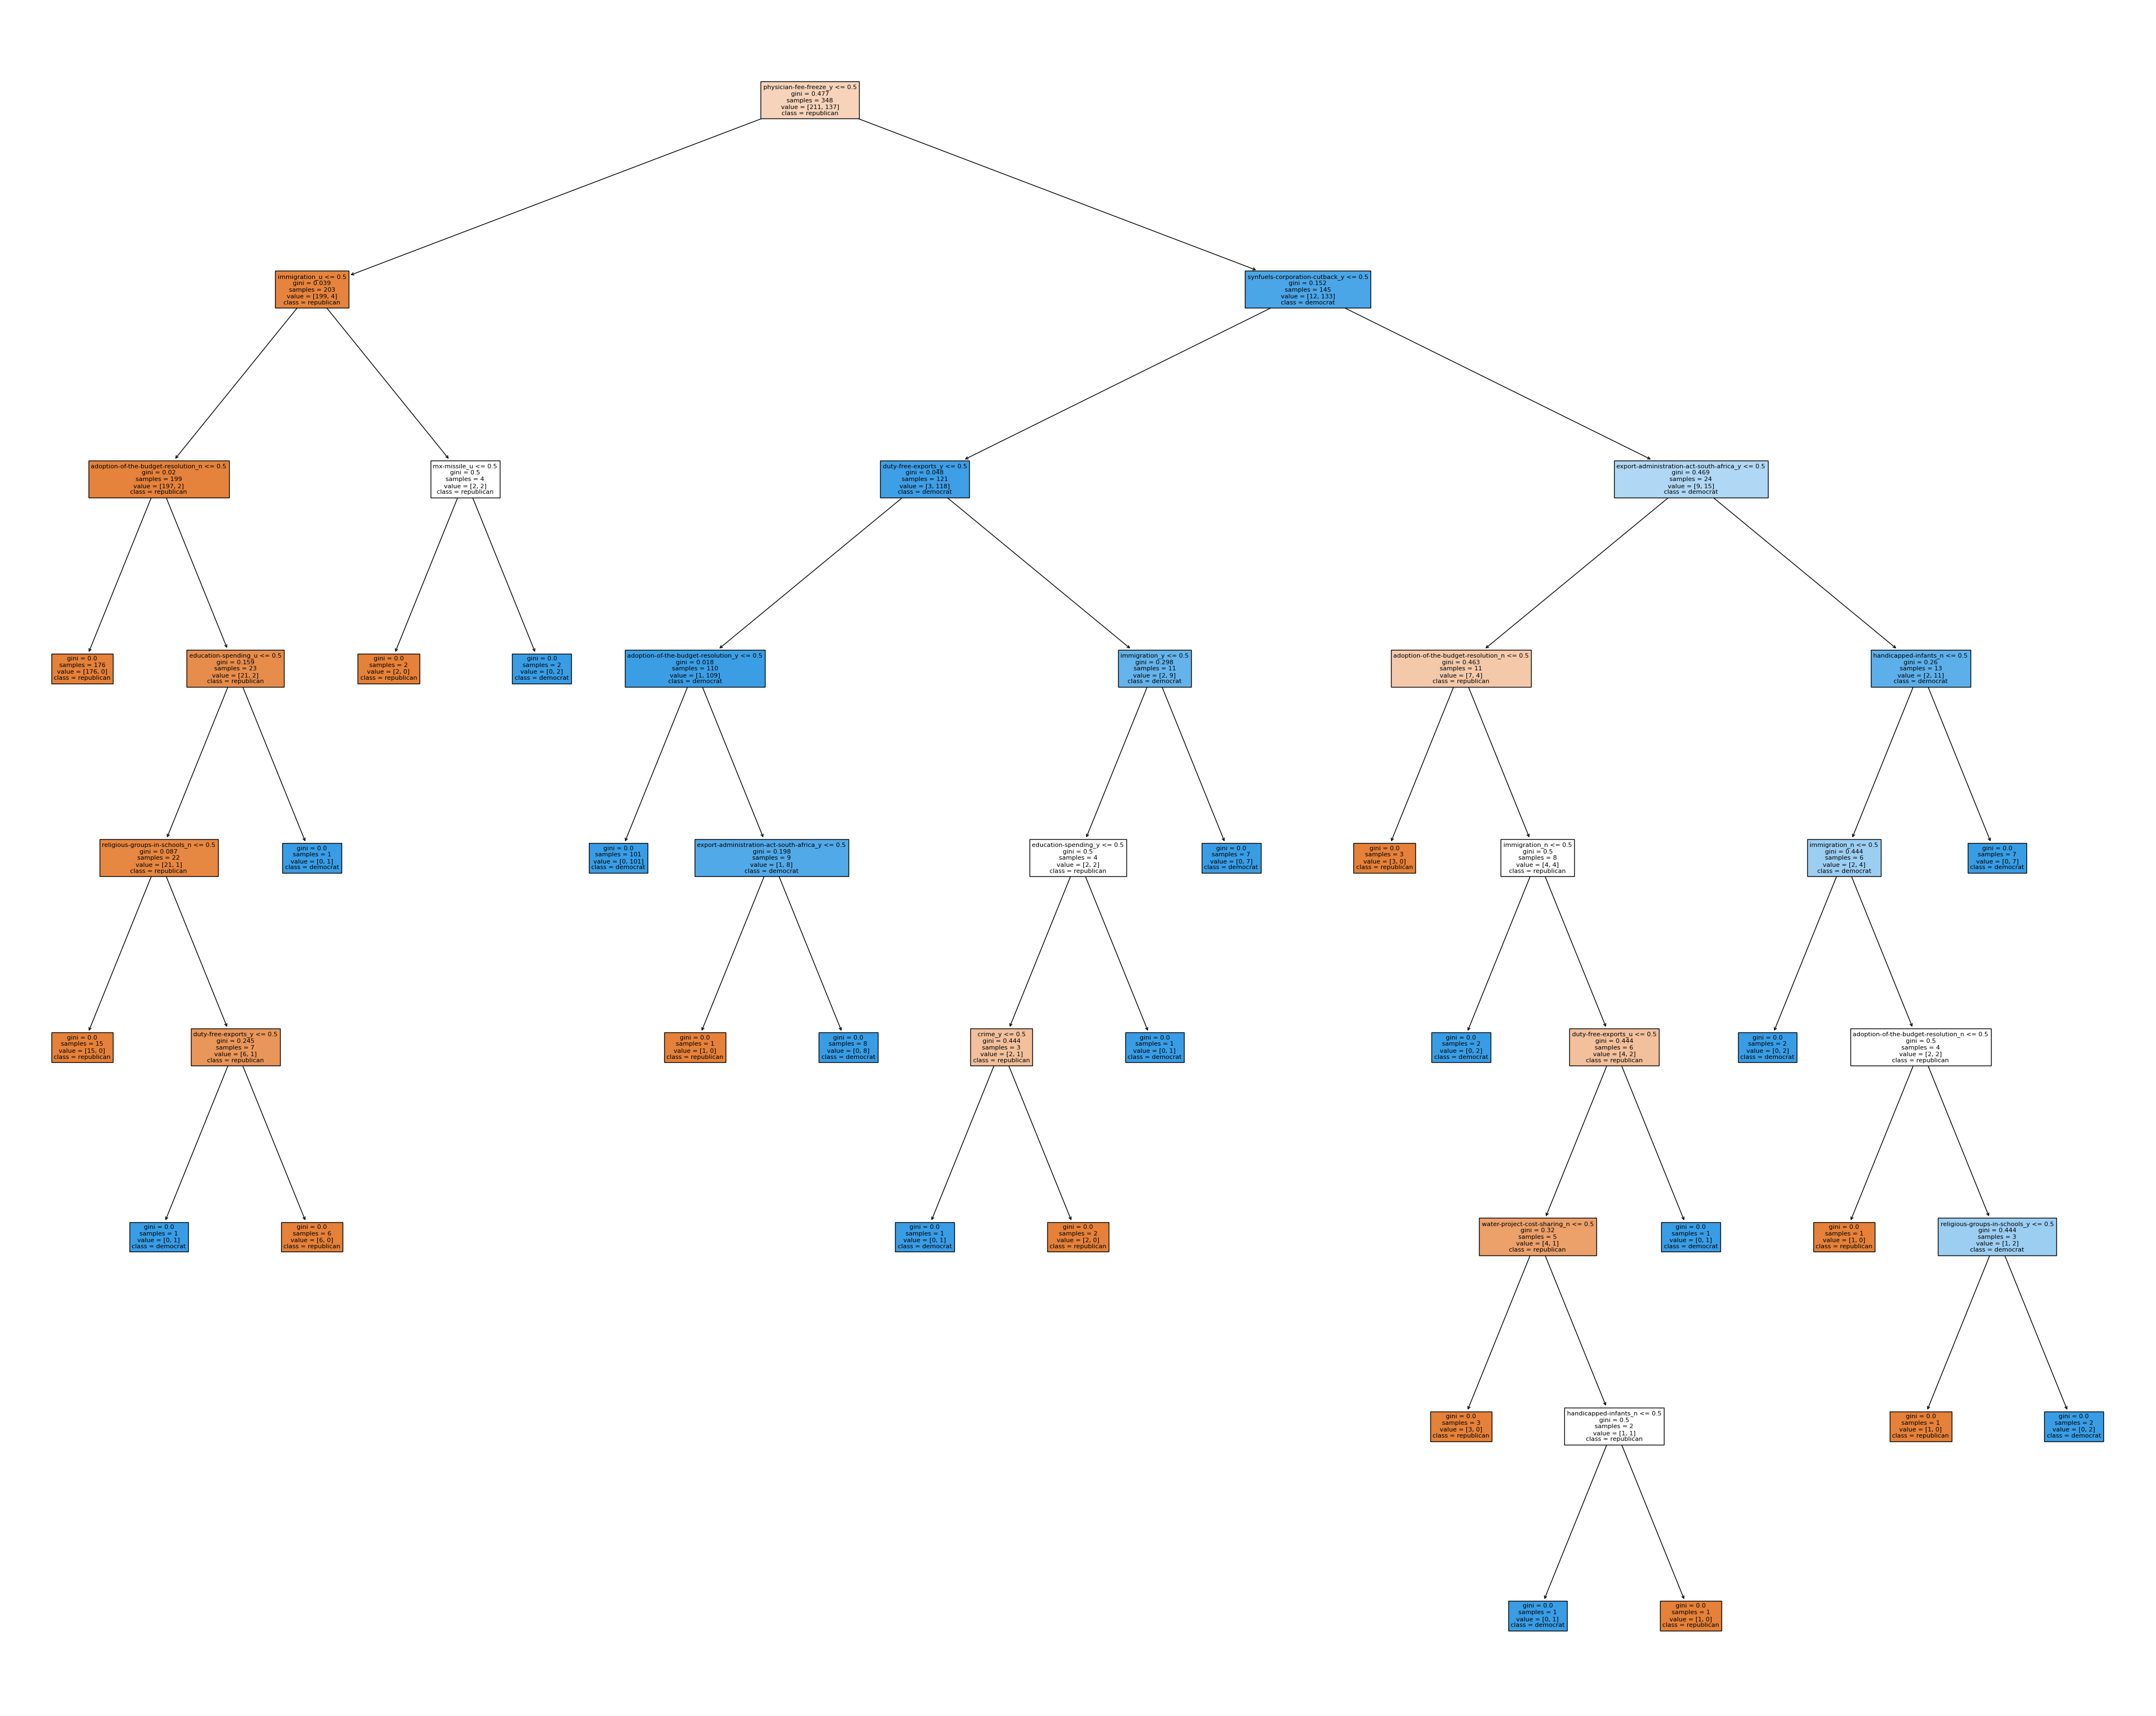

In [10]:
#Print induced trees for the voting and car data sets

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=y.unique(),
                   filled=True)

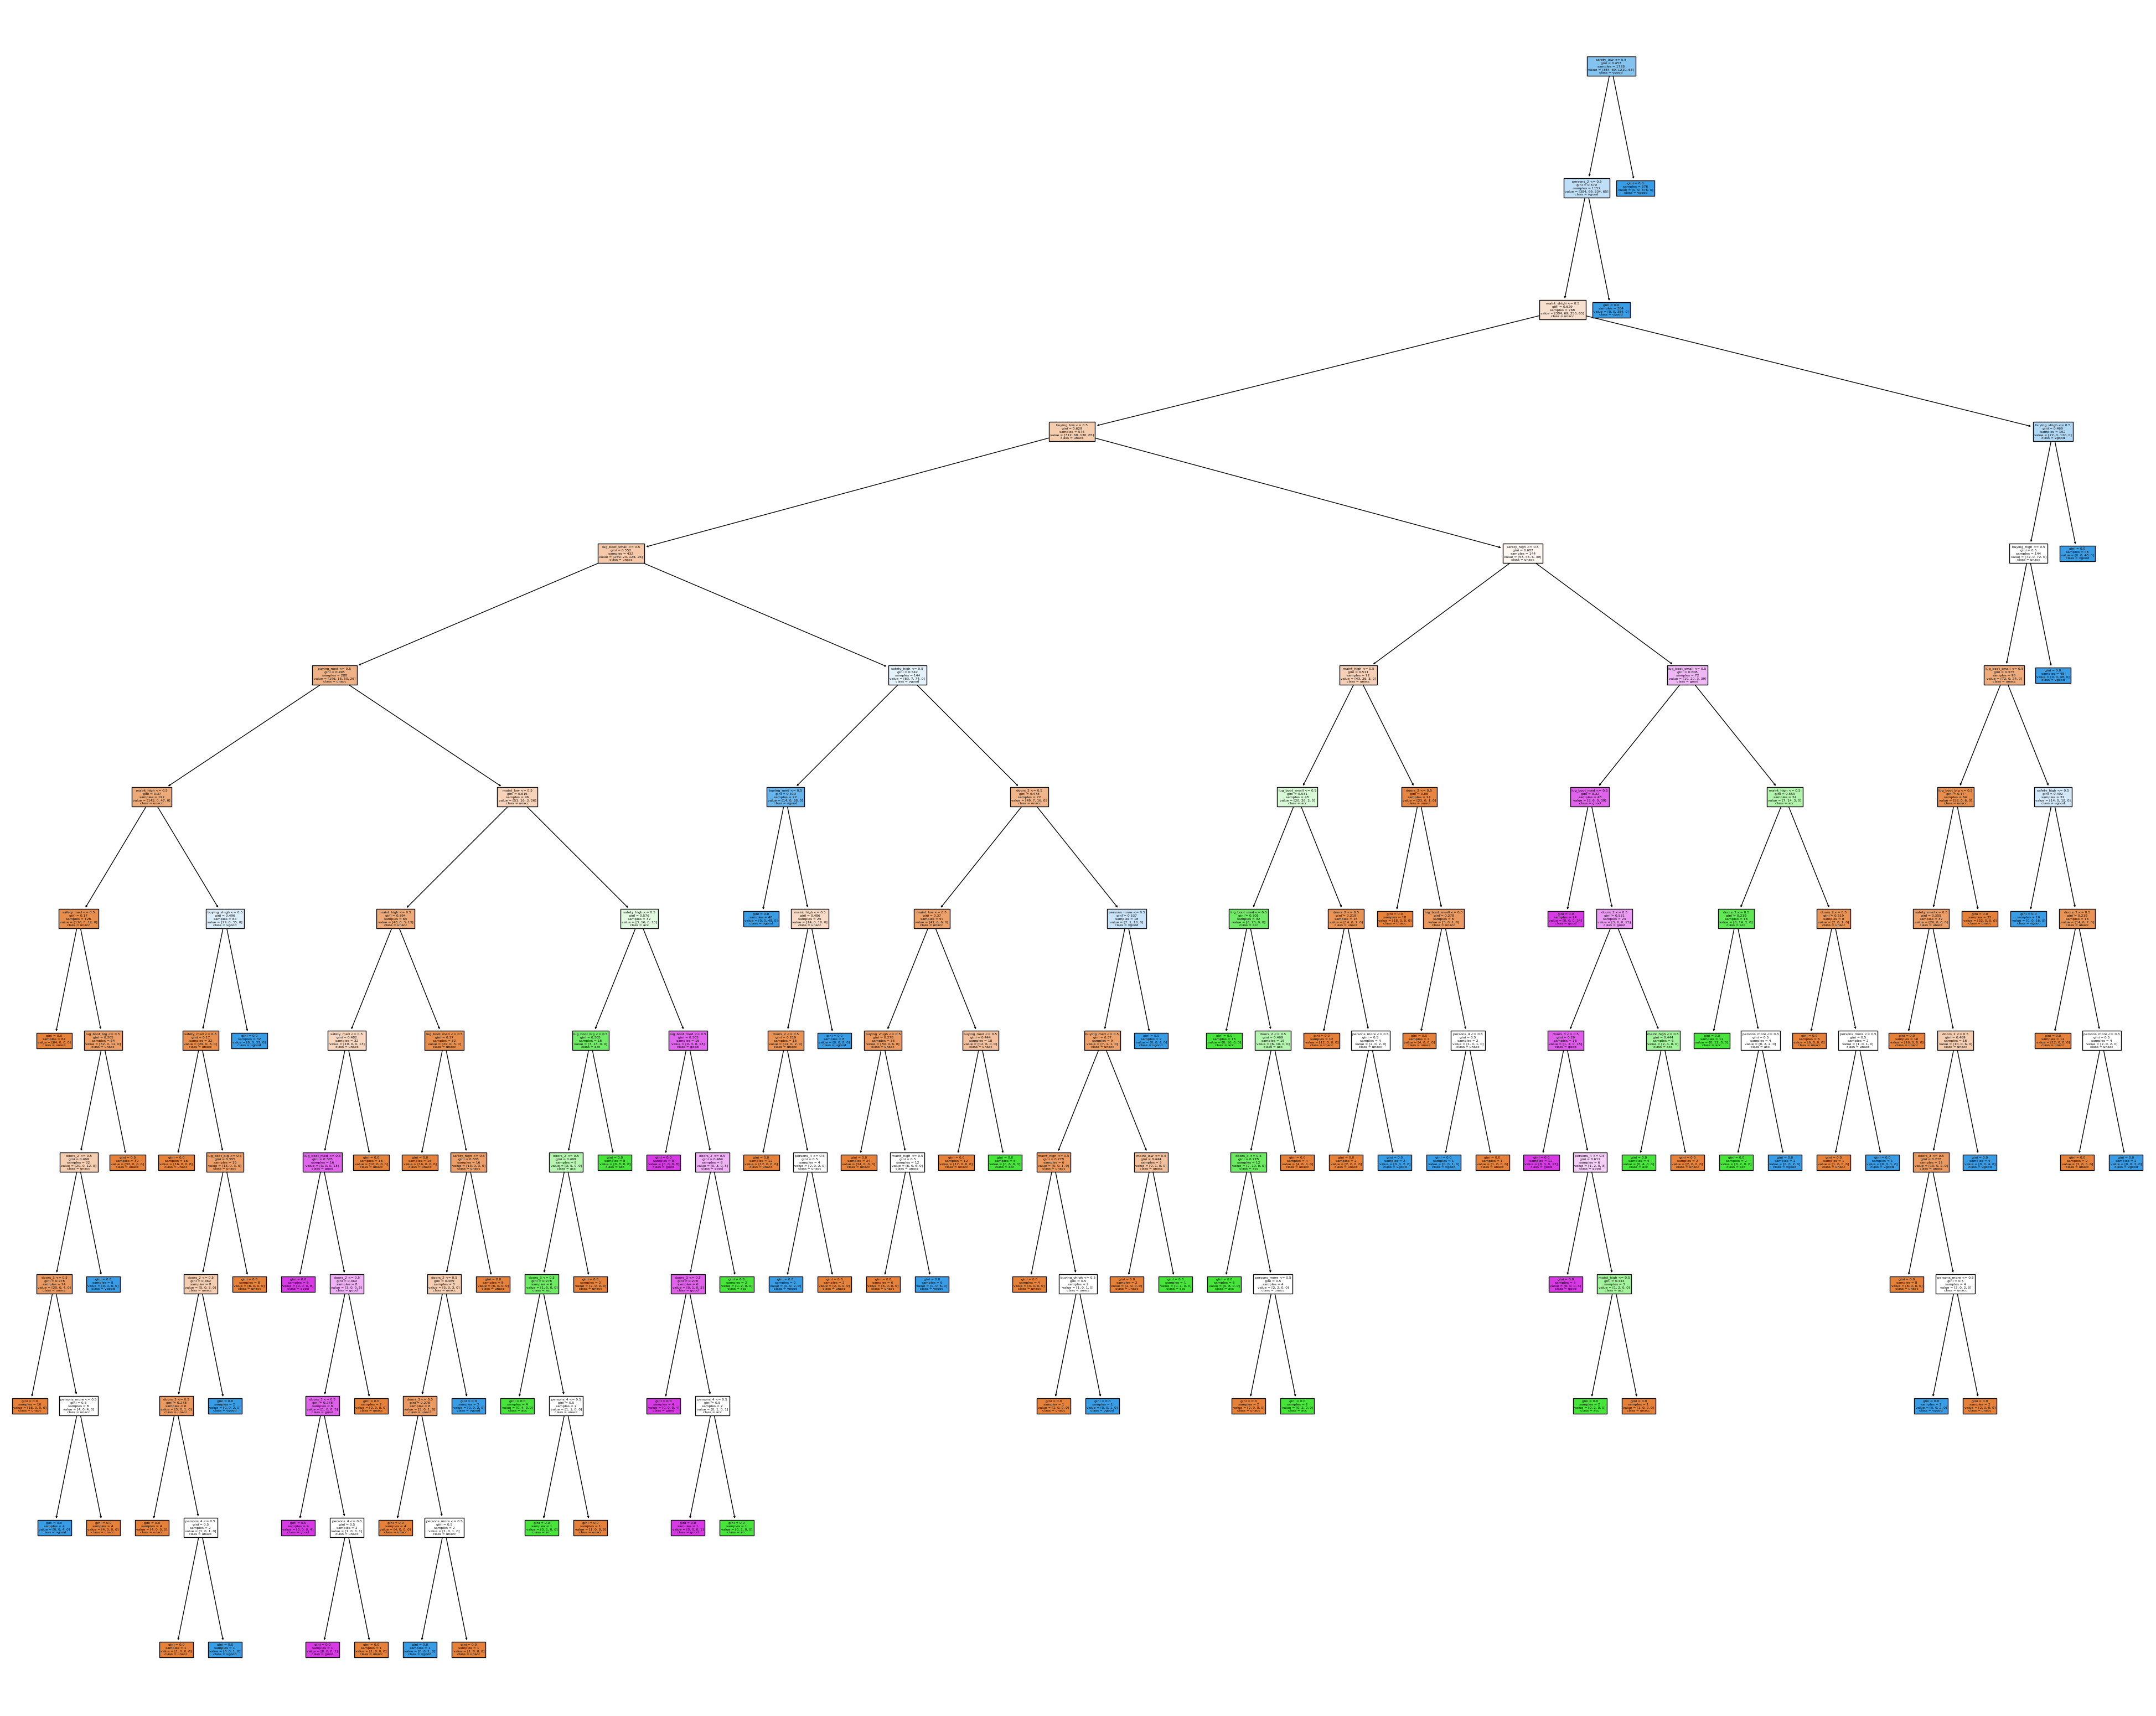

In [12]:
clf = DecisionTreeClassifier()

clf.fit(X, y)

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=y.unique(),
                   filled=True)

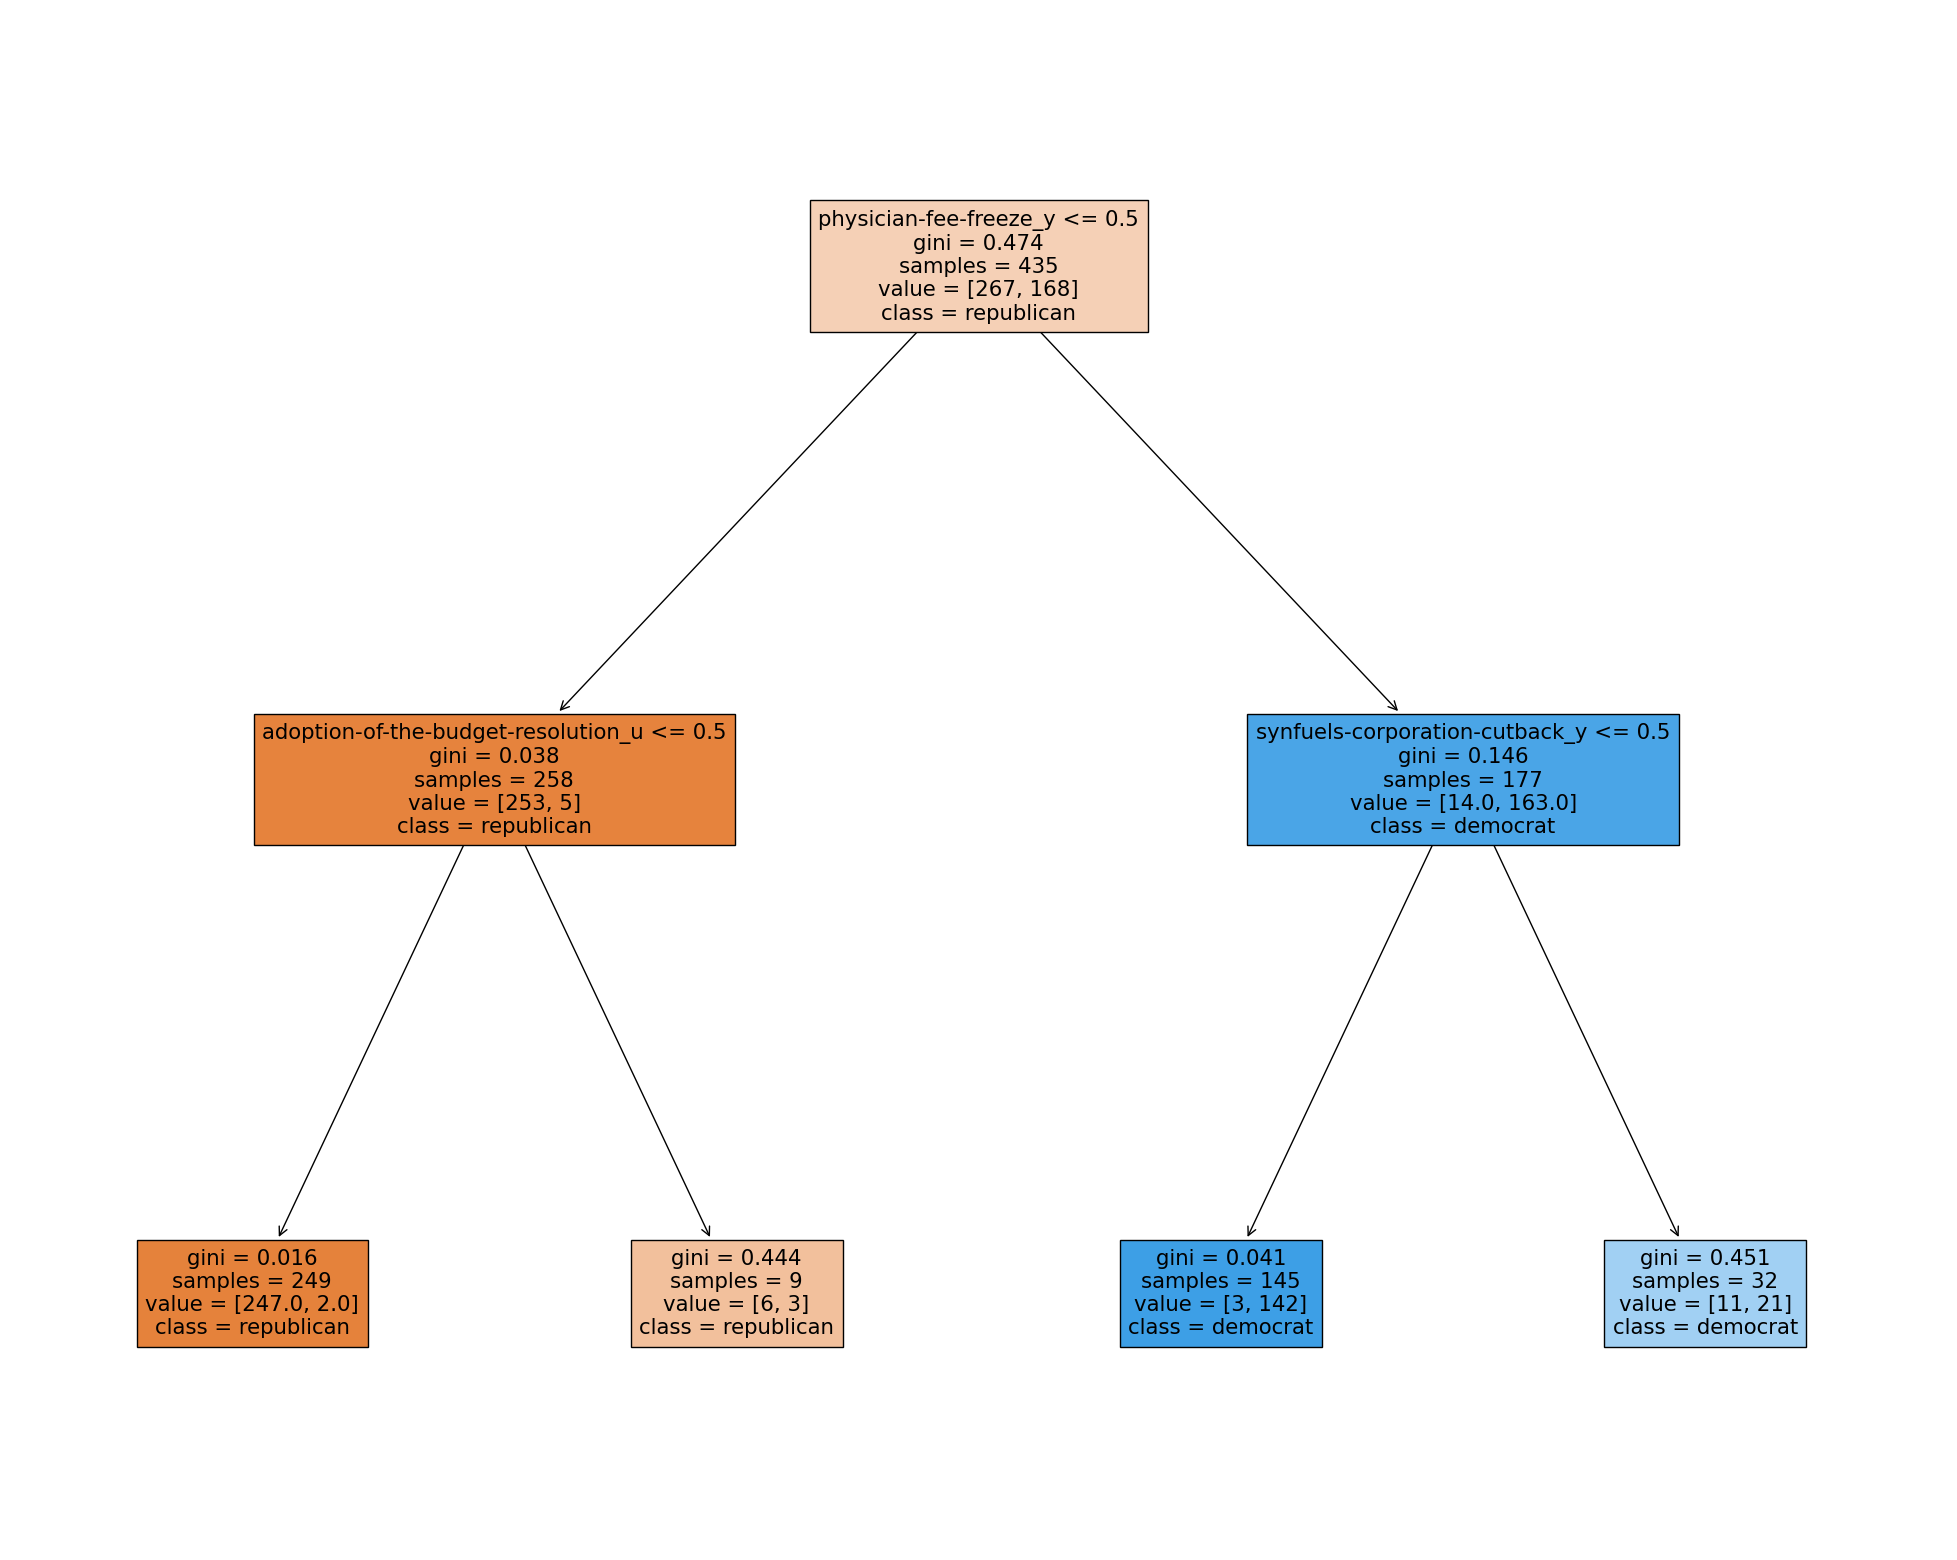

In [17]:
clf = DecisionTreeClassifier(max_depth=2)

clf.fit(X, y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=y.unique(),
                   filled=True)

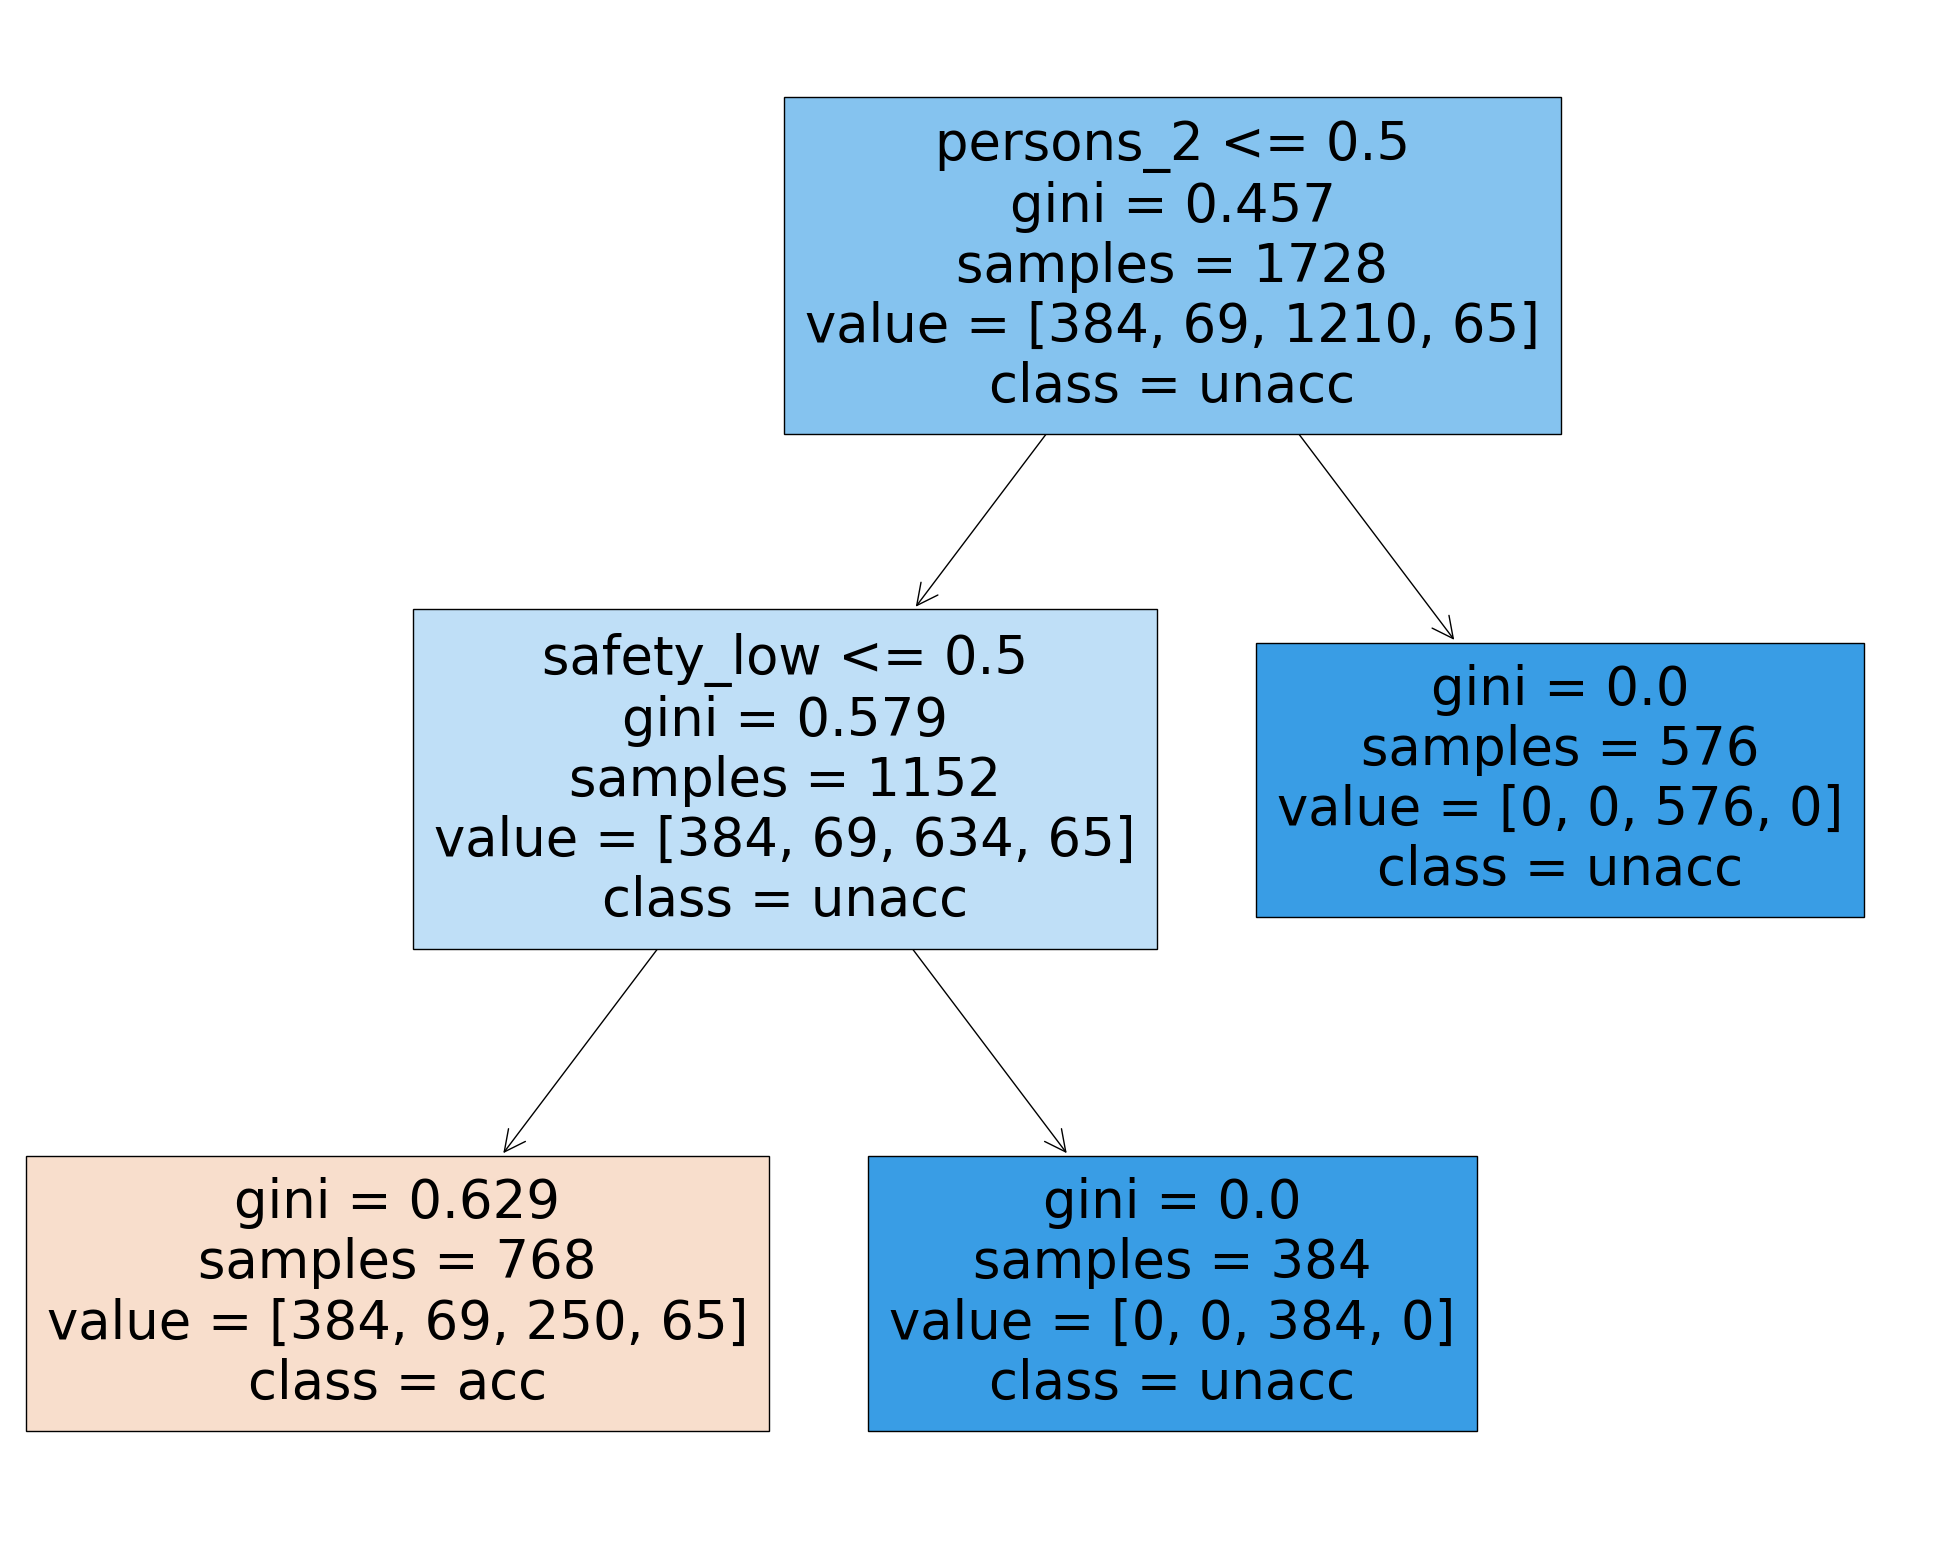

In [11]:
clf = DecisionTreeClassifier(max_depth=2)

clf.fit(X, y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=['acc', 'good', 'unacc', 'vgood'],
                   filled=True)

In [ ]:
print("Feature importances: ", clf.feature_importances_)

Feature importances:  [0.         0.         0.         0.         0.         0.
 0.         0.01033041 0.         0.         0.         0.95892023
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.03074936 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


In [5]:
# @title 2.3 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.3DT"
questions = ["What did the Decision Tree learn about the Voting dataset?", "What did the Decision Tree learn about the Cars dataset?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**What did the Decision Tree learn about the Voting dataset?**

It is very easy to tell what the decision tree has learned so far about the Voting dataset. Its first split is on whether a representative did or did not vote yes to the physician fee freeze bill. Those who voted yes were likely to be democrat. Those who did not vote yes (either voted no or unknown) were very likely (about 50:1 odds) to be republican. After that, those who voted yes or no (not unkown) to the adoption of the budget resolution bill were very likely to be republican. Those who had an unknown vote for that bill were still likely to be republican, but less so. On the democrat side, out of those who voted yes to the physician fee freeze bill, those who did not vote yes to the synfuels corporation cutback bill were very likely to be democrat, while those who did vote yes to that bill were still likely to be democrat, but less so. With just two splits on the data, the Decision Tree was already able to classify most of the data with a high level of precision. I doubt it will take many more splits to get a high accuracy across all of the dataset.

**What did the Decision Tree learn about the Cars dataset?**

The Decision Tree was quickly able to classify over 900 rows just by asking two questions: is it a two person car (persons_2 > 0.5), or does it have a low safety rating (safety_low > 0.5)? If either of these are true, it imidiately classifies the car as unacceptable. If both of these questions are false, then it has some more sorting to do. It surprised me that it was able to get a pure leaf node so quickly, but the nature of the data was such that it did.

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

In [42]:
# Experiment with criterion parameter

clf = DecisionTreeClassifier(criterion='gini')

random_states = [27, 42, 57, 72, 87]

for i,random_state in enumerate(random_states):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    clf.fit(X_train, y_train)
    print(f"| {i+1} | gini | {clf.score(X_train, y_train)} | {clf.score(X_test, y_test):.3f} |")

| 1 | gini | 1.0 | 0.974 |
| 2 | gini | 1.0 | 0.960 |
| 3 | gini | 1.0 | 0.974 |
| 4 | gini | 1.0 | 0.971 |
| 5 | gini | 1.0 | 0.960 |


| run | criterion | train accuracy | test accuracy |
|-----|-----------|----------| -------|
| 1 | entropy | 1.0 | 0.986 |
| 2 | entropy | 1.0 | 0.965 |
| 3 | entropy | 1.0 | 0.983 |
| 4 | entropy | 1.0 | 0.974 |
| 5 | entropy | 1.0 | 0.962 |
| 1 | log_loss | 1.0 | 0.986 |
| 2 | log_loss | 1.0 | 0.965 |
| 3 | log_loss | 1.0 | 0.988 |
| 4 | log_loss | 1.0 | 0.977 |
| 5 | log_loss | 1.0 | 0.957 |
| 1 | gini | 1.0 | 0.974 |
| 2 | gini | 1.0 | 0.962 |
| 3 | gini | 1.0 | 0.962 |
| 4 | gini | 1.0 | 0.974 |
| 5 | gini | 1.0 | 0.960 |
| -- | -- | -- | -- |
| Avg | entropy | 1.0 | 0.974 |
| Avg | log_loss | 1.0 | 0.975 |
| Avg | gini | 1.0 | 0.966 |

In [22]:
# @title 2.4 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.4DT"
questions = ["Discuss the effects each split criterion had."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Discuss the effects each split criterion had.**

I tested each split criterion on the Cars dataset with five train-test splits, using the same 5 random states, then I averaged their train and test accuracy scores. All three split criterions had similar test accuracies. They also all were able to completely split the training data to get a perfect score on it. In this analysis, the entropy and log-loss criterions seemd to outperform the gini one. This surprised me, since gini was the default criterion so I expected it to perform better. However, this goes to show that the default parameters are not always the best ones. In fact, you often have to test out different parameters to find which ones work best wiith your data.

## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%)
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [ ]:
# Explore different overfit parameters

In [ ]:
# @title 3.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "3.1DT"
questions = ["Discuss what you learned about overfit.", "Were you able to find hyperparameters that achieved a higher testing accuracy than the fully induced tree?"]
Discussion(discussion_id, questions, net_id); pass

### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [ ]:
# Pruning

In [ ]:
# @title 3.2 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "3.2DT"
questions = ["Interpret your table.", "Which ccp_alpha value achieved the best testing accuracy?"]
Discussion(discussion_id, questions, net_id); pass

## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [ ]:
#Learn regression data set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
# @title 4.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "4.1DT"
questions = ["Discuss your general findings.", "Did you adjust any hyperparameters to achieve a greater testing accuracy?"]
Discussion(discussion_id, questions, net_id); pass

## 5. (Optional 15% extra credit) Code up your own C4.5 Decision Tree Learner
Implement the C4.5 algorithm discussed in class and in the slides, NOT the CART algorithm.  Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Use standard information gain as your basic attribute evaluation metric.  Note that C4.5 would usually augment information gain with a mechanism to penalize statistically insignificant attribute splits to avoid overfit (e.g. early stopping, gain ratio, etc.), but you are not required to do that.
- Include the ability to handle unknown attributes by making "unknown" a new attribute value when needed.
- You do not need to handle real valued attributes.
- It is a good idea to use simple data set (like the pizza homework), which you can check by hand, to test each detailed step of your algorithm to make sure it works correctly.
- Run your algorithm on the voting data set above with unknown attributes and compare your results with CART.

In [ ]:
# @title 5.0 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "5.0DT"
questions = ["Include a general discussion about what you did/learned by implementing your own C4.5 Decission Tree."]
Discussion(discussion_id, questions, net_id); pass

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class DTClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self,counts=None):
        """ Initialize class with chosen hyperparameters.
        Args:
        Optional Args (Args we think will make your life easier):
            counts: A list of Ints that tell you how many types of each feature there are
        Example:
            DT  = DTClassifier()
            or
            DT = DTClassifier(count = [2,3,2,2])
            Dataset =
            [[0,1,0,0],
            [1,2,1,1],
            [0,1,1,0],
            [1,2,0,1],
            [0,0,1,1]]

        """

    def fit(self, X, y):
        """ Fit the data; Make the Decision tree

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 1D numpy array with the training targets

        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets

        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass


    def score(self, X, y):
        """ Return accuracy(Classification Acc) of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 1D numpy array of the targets
        """
        return 0

In [ ]:
# Optional Debugging Dataset - Pizza Homework
# pizza_dataset = np.array([[1,2,0],[0,0,0],[0,1,1],[1,1,1],[1,0,0],[1,0,1],[0,2,1],[1,0,0],[0,2,0]])
# pizza_labels = np.array([2,0,1,2,1,2,1,1,0])